# 2018-07-26_wikiの調査

M先輩から「wikiのサーバ、中で何動いてるかレポート作って」と指示があった

ログ保存を有効化

In [1]:
%env lc_wrapper_force=on

env: lc_wrapper_force=on


# 調査対象の確認

ansibleのインベントリファイルで対象サーバを確認し、簡単なコマンドが通ることを確認しておく

In [2]:
hosts = !cat ./hosts
hosts

path: /home/jovyan/jtf2018/.log/20180727/20180727-122745-0729.log (1 logs recorded)
start time: 2018-07-27 12:27:45(UTC)
end time: 2018-07-27 12:27:45(UTC)
output size: 555 bytes
0 chunks with matched keywords or errors
----


['jtf2018_boinc_1', 'jtf2018_wiki_1', 'jtf2018_3dwebmap_1']

In [3]:
for h in hosts:
        if h.find('wiki') > -1:
            target = ' -i ./hosts {} -c docker'.format(h)
target

path: /home/jovyan/jtf2018/.log/20180727/20180727-122800-0512.log (1 logs recorded)
start time: 2018-07-27 12:28:00(UTC)
end time: 2018-07-27 12:28:00(UTC)
output size: 641 bytes
0 chunks with matched keywords or errors
----


' -i ./hosts jtf2018_wiki_1 -c docker'

In [4]:
!sudo ansible -a "ls -la" {target}

path: /home/jovyan/jtf2018/.log/20180727/20180727-122804-0809.log (1 logs recorded)
start time: 2018-07-27 12:28:04(UTC)
end time: 2018-07-27 12:28:12(UTC)
output size: 2654 bytes
0 chunks with matched keywords or errors
----
 [WARNING] Ansible is in a world writable directory (/home/jovyan/jtf2018), ignoring it as an ansible.cfg source.
jtf2018_wiki_1 | SUCCESS | rc=0 >>
total 152
drwxr-xr-x 1 wiki wiki  4096 Nov  5  2017 .
drwxr-xr-x 1 wiki wiki  4096 Jul 27 12:07 ..
-rw-r--r-- 1 wiki wiki    40 Sep  8  2014 .bowerrc
drwxr-xr-x 1 wiki wiki  4096 Nov  5  2017 .git
-rwxr-xr-x 1 wiki wiki   228 Nov  4  2017 .gitignore
drwxr-xr-x 1 wiki wiki  4096 Nov  5  2017 .idea
-rw-r--r-- 1 wiki wiki   305 Nov  4  2017 .travis.yml
drwxr-xr-x 1 wiki wiki  4096 Nov  5  2017 .vagrant
drwxr-xr-x 1 wiki wiki  4096 Nov  5  2017 .venv
-rw-r--r-- 1 wiki wiki 18041 Sep  8  2014 LICENSE
-rw-r--r-- 1 wiki wiki   151 Aug 20  2017 MANIFEST.in
-rw-r--r-- 1 wiki wiki   616 Nov  4  2017 Pipfile
-rw-r--r-- 1 wiki wi

# 調査対象から情報を収集

## OSのバージョン

「linux os 確認」でググって見つけた、/etc/issueを確認する方法を使う

https://eng-entrance.com/linux-os-version

In [5]:
command = "'cat /etc/issue'"
!sudo ansible -a {command} {target}

path: /home/jovyan/jtf2018/.log/20180727/20180727-122826-0710.log (2 logs recorded)
start time: 2018-07-27 12:28:26(UTC)
end time: 2018-07-27 12:28:32(UTC)
output size: 735 bytes
0 chunks with matched keywords or errors
----
 [WARNING] Ansible is in a world writable directory (/home/jovyan/jtf2018), ignoring it as an ansible.cfg source.
jtf2018_wiki_1 | SUCCESS | rc=0 >>
Ubuntu 16.04.3 LTS \n \l


## サービス

「debian サービス 一覧」でググって見つけた、insservを使う

https://www.mk-mode.com/octopress/2015/06/03/debian-8-service-management/

In [6]:
command = "'insserv -s'"
!sudo ansible -a {command} {target}

path: /home/jovyan/jtf2018/.log/20180727/20180727-122849-0462.log (1 logs recorded)
start time: 2018-07-27 12:28:49(UTC)
end time: 2018-07-27 12:28:55(UTC)
output size: 811 bytes
1 chunks with matched keywords or errors
----
 [WARNING] Ansible is in a world writable directory (/home/jovyan/jtf2018), ignoring it as an ansible.cfg source.
jtf2018_wiki_1 | FAILED | rc=2 >>
[Errno 2] No such file or directory


RuntimeError: Unexpected exit code: 2

「ubuntu サービス 確認」でググって、何種類か載ってるのを見つけたので、順に試す

https://server-setting.info/debian/debian-like-chkconfig.html

In [7]:
command = "'sysv-rc-conf --list'"
!sudo ansible -a {command} {target}

path: /home/jovyan/jtf2018/.log/20180727/20180727-123115-0013.log (1 logs recorded)
start time: 2018-07-27 12:31:14(UTC)
end time: 2018-07-27 12:31:26(UTC)
output size: 820 bytes
1 chunks with matched keywords or errors
----
 [WARNING] Ansible is in a world writable directory (/home/jovyan/jtf2018), ignoring it as an ansible.cfg source.
jtf2018_wiki_1 | FAILED | rc=2 >>
[Errno 2] No such file or directory


RuntimeError: Unexpected exit code: 2

In [8]:
command = "'rcconf --list'"
!sudo ansible -a {command} {target}

path: /home/jovyan/jtf2018/.log/20180727/20180727-123154-0960.log (0 logs recorded)
start time: 2018-07-27 12:31:54(UTC)
end time: 2018-07-27 12:32:03(UTC)
output size: 739 bytes
1 chunks with matched keywords or errors
----
 [WARNING] Ansible is in a world writable directory (/home/jovyan/jtf2018), ignoring it as an ansible.cfg source.
jtf2018_wiki_1 | FAILED | rc=2 >>
[Errno 2] No such file or directory


RuntimeError: Unexpected exit code: 2

In [9]:
command = "'ls /etc/rc1.d/'"
!sudo ansible -a {command} {target}
command = "'ls /etc/rc2.d/'"
!sudo ansible -a {command} {target}
command = "'ls /etc/rc3.d/'"
!sudo ansible -a {command} {target}
command = "'ls /etc/rc4.d/'"
!sudo ansible -a {command} {target}
command = "'ls /etc/rc5.d/'"
!sudo ansible -a {command} {target}

path: /home/jovyan/jtf2018/.log/20180727/20180727-123236-0794.log (0 logs recorded)
start time: 2018-07-27 12:32:36(UTC)
end time: 2018-07-27 12:33:05(UTC)
output size: 2001 bytes
1 chunks with matched keywords or errors
----
 [WARNING] Ansible is in a world writable directory (/home/jovyan/jtf2018), ignoring it as an ansible.cfg source.
jtf2018_wiki_1 | SUCCESS | rc=0 >>
README
S01killprocs
S02single

 [WARNING] Ansible is in a world writable directory (/home/jovyan/jtf2018), ignoring it as an ansible.cfg source.
jtf2018_wiki_1 | SUCCESS | rc=0 >>
README
S01rsync
S02ondemand
S02rc.local

 [WARNING] Ansible is in a world writable directory (/home/jovyan/jtf2018), ignoring it as an ansible.cfg source.
jtf2018_wiki_1 | SUCCESS | rc=0 >>
README
S01rsync
S02ondemand
S02rc.local

 [WARNING] Ansible is in a world writable directory (/home/jovyan/jtf2018), ignoring it as an ansible.cfg source.
jtf2018_wiki_1 | SUCCESS | rc=0 >>
README
S01rsync
S02ondemand
S02rc.local

 [WARNING] Ansible is in

webサーバなどの、それっぽいサービスは見つからず

## プロセス

psコマンド、これは覚えてる

In [10]:
command = "'ps aux'"
!sudo ansible -a {command} {target}

path: /home/jovyan/jtf2018/.log/20180727/20180727-123343-0556.log (2 logs recorded)
start time: 2018-07-27 12:33:43(UTC)
end time: 2018-07-27 12:33:48(UTC)
output size: 3238 bytes
5 chunks with matched keywords or errors
----
 [WARNING] Ansible is in a world writable directory (/home/jovyan/jtf2018), ignoring it as an ansible.cfg source.
jtf2018_wiki_1 | SUCCESS | rc=0 >>
USER       PID %CPU %MEM    VSZ   RSS TTY      STAT START   TIME COMMAND
wiki         1  0.0  0.0   4508     0 ?        Ss   12:02   0:00 /bin/sh -c . /home/wiki/realms-wiki/.venv/bin/activate &&     gunicorn         --name realms-wiki         --access-logfile -         --error-logfile -         --worker-class gevent         --workers ${WORKERS}         --bind 0.0.0.0:5000         --chdir /home/wiki/realms-wiki         'realms:create_app()'
wiki         6  0.0  0.0  53412  1944 ?        S    12:02   0:00 /home/wiki/realms-wiki/.venv/bin/python /home/wiki/realms-wiki/.venv/bin/gunicorn --name realms-wiki --access-logfi

/home/wiki/realms-wiki 以下にある実行ファイルが、pythonで動いてる雰囲気

## LISTENポート

「listen debian」でググって見つけた、ssを使う

http://mzgkworks.com/post/linux-port-confirm/

In [11]:
command = "'ss -lnat'"
!sudo ansible -a {command} {target}

path: /home/jovyan/jtf2018/.log/20180727/20180727-123458-0795.log (1 logs recorded)
start time: 2018-07-27 12:34:58(UTC)
end time: 2018-07-27 12:35:05(UTC)
output size: 886 bytes
0 chunks with matched keywords or errors
----
 [WARNING] Ansible is in a world writable directory (/home/jovyan/jtf2018), ignoring it as an ansible.cfg source.
jtf2018_wiki_1 | SUCCESS | rc=0 >>
State      Recv-Q Send-Q Local Address:Port               Peer Address:Port              
LISTEN     0      128          *:5000                     *:*                  


In [12]:
command = "'ss -lnau'"
!sudo ansible -a {command} {target}

path: /home/jovyan/jtf2018/.log/20180727/20180727-123507-0601.log (1 logs recorded)
start time: 2018-07-27 12:35:07(UTC)
end time: 2018-07-27 12:35:14(UTC)
output size: 794 bytes
0 chunks with matched keywords or errors
----
 [WARNING] Ansible is in a world writable directory (/home/jovyan/jtf2018), ignoring it as an ansible.cfg source.
jtf2018_wiki_1 | SUCCESS | rc=0 >>
State      Recv-Q Send-Q Local Address:Port               Peer Address:Port              


5000番ポートでLISTENしてる

# サービスの確認

5000番ポートにブラウザでアクセスしてみる

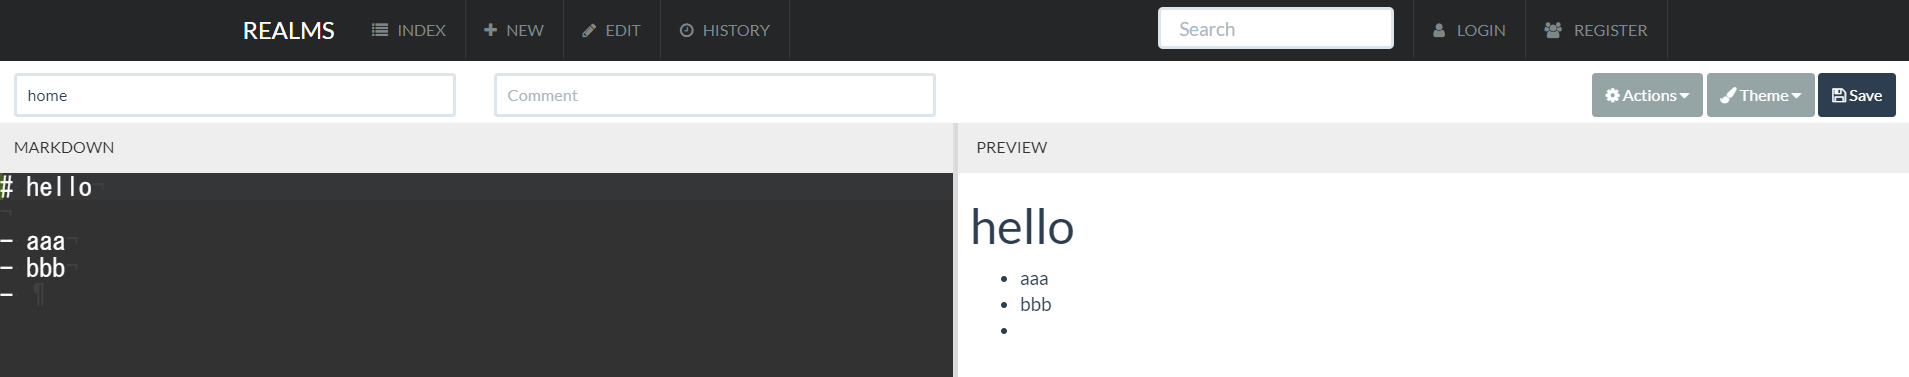

「realms-wiki」でググってみたところ

https://github.com/scragg0x/realms-wiki

wikiのようだ

# まとめ

5000番ポートからサービスされてるpython製のwiki「realms」が動いている